## Importacion de libreria

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import fbeta_score, accuracy_score
from time import time
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

### Lectura del dataset

In [47]:
data = pd.read_csv('predictive_maintenance.csv')

## Exploracion de los datos

In [48]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [50]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [51]:
data = data.drop(['UDI', 'Product ID'], axis=1)

In [52]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [53]:
data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [54]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

<AxesSubplot:>

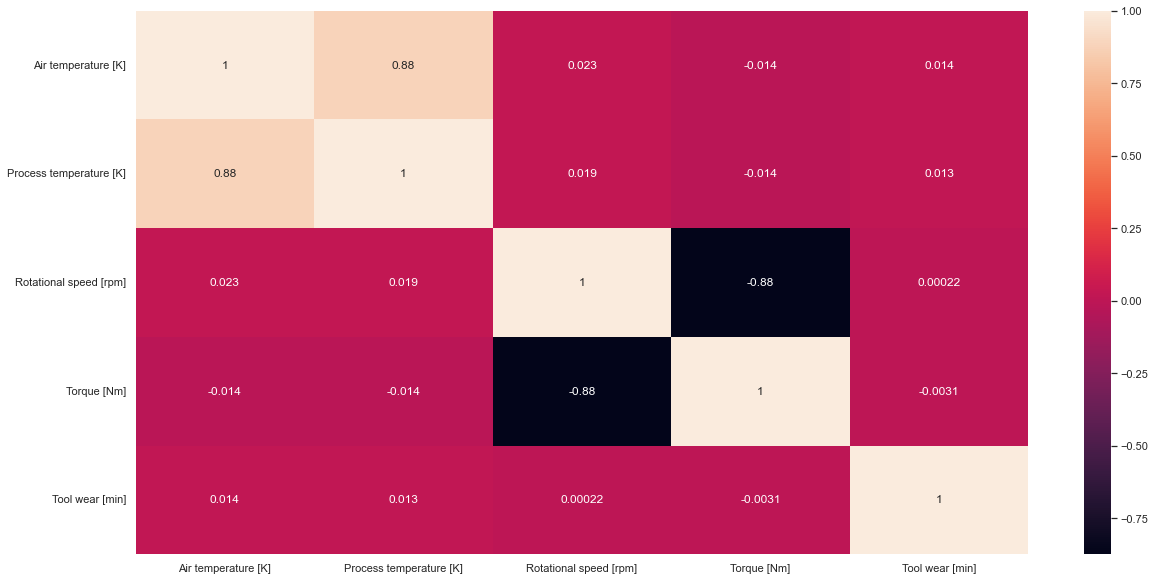

In [55]:
heatmapdf = data.drop(['Type','Target','Failure Type'], axis=1)
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(heatmapdf.corr(), annot=True)

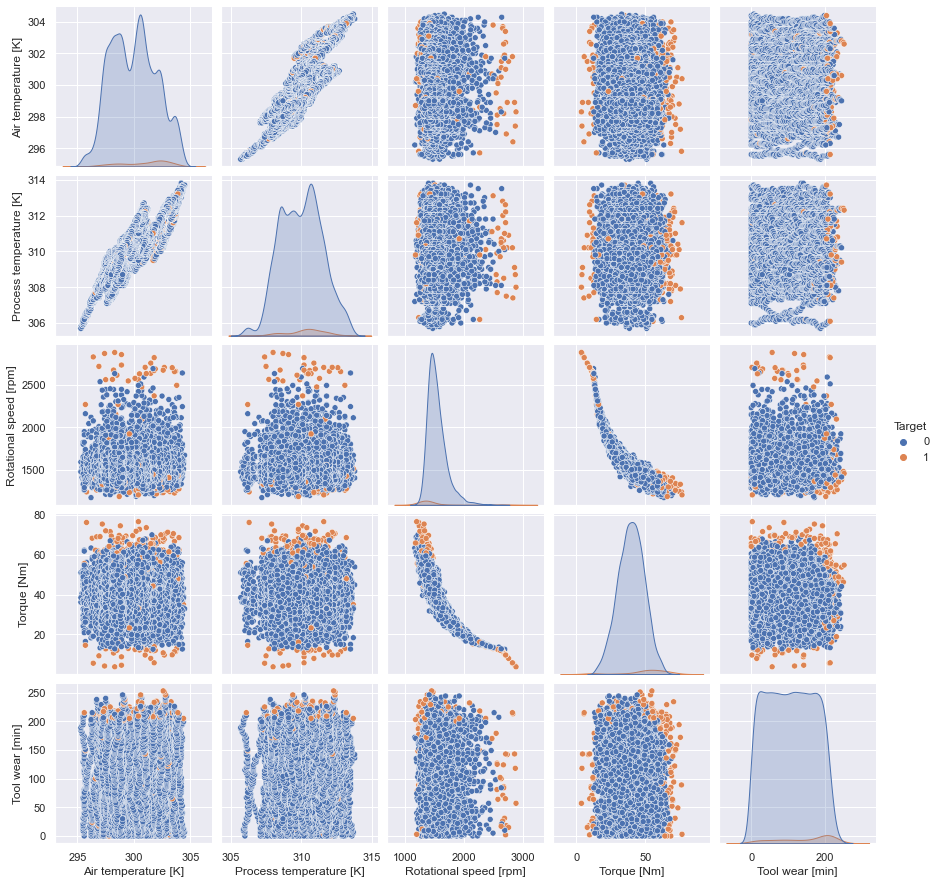

In [56]:
sns.pairplot(data, hue="Target")


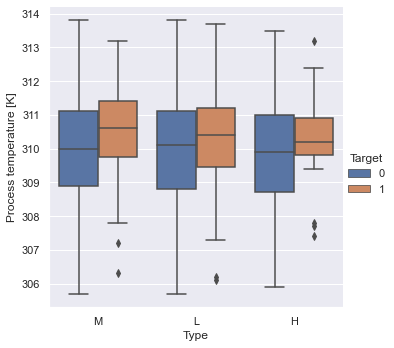

In [57]:
sns.catplot(x="Type", y="Process temperature [K]", hue="Target", kind="box", data=data)

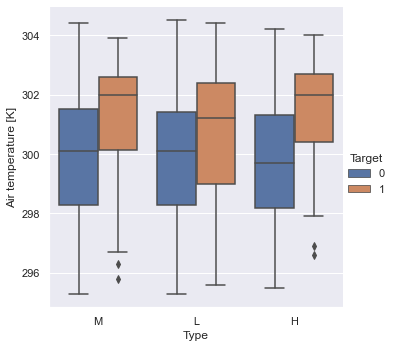

In [58]:
sns.catplot(x="Type", y="Air temperature [K]", hue="Target", kind="box", data=data)

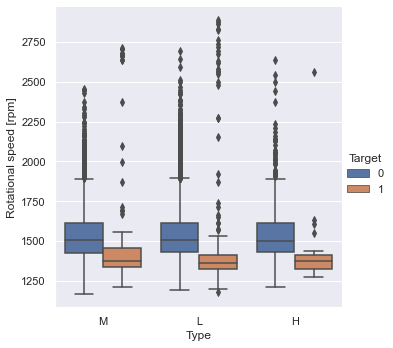

In [59]:
sns.catplot(x="Type", y="Rotational speed [rpm]", hue="Target", kind="box", data=data)

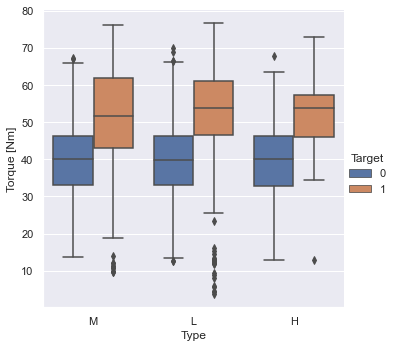

In [60]:
sns.catplot(x="Type", y="Torque [Nm]", hue="Target", kind="box", data=data)

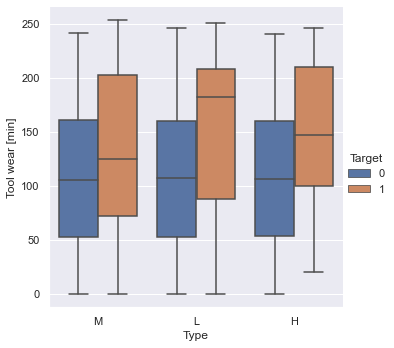

In [61]:
sns.catplot(x="Type", y="Tool wear [min]", hue="Target", kind="box", data=data)

## Preprocesamiento

In [62]:
encoder = LabelEncoder()
data['Type'] = encoder.fit_transform(data[["Type"]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,0,298.9,308.4,1632,31.8,17,0,No Failure
9997,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,0,299.0,308.7,1408,48.5,25,0,No Failure


In [64]:
data = data.drop('Failure Type', axis=1)

## Split de datos en entrenamiento y prueba

In [65]:


x = data[['Type','Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


## Creacion del metodo para entrenar 

In [66]:


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    start = time() 
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time()
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Obtener hora de termino
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Inicializacion de los modelos

In [67]:

#Clasificadores sin ensamble
clf_A = DecisionTreeClassifier(random_state =101)
clf_B = SVC(random_state = 101)
clf_C = KNeighborsClassifier()

#TecinaS de ensamble Bagging y Boost 
clf_D = AdaBoostClassifier(random_state = 101)
clf_E = BaggingClassifier(random_state = 101)
clf_F = GradientBoostingClassifier(random_state = 101)

samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 80 samples.
DecisionTreeClassifier trained on 800 samples.
DecisionTreeClassifier trained on 8000 samples.
SVC trained on 80 samples.
SVC trained on 800 samples.
SVC trained on 8000 samples.
KNeighborsClassifier trained on 80 samples.
KNeighborsClassifier trained on 800 samples.
KNeighborsClassifier trained on 8000 samples.
AdaBoostClassifier trained on 80 samples.
AdaBoostClassifier trained on 800 samples.
AdaBoostClassifier trained on 8000 samples.
BaggingClassifier trained on 80 samples.
BaggingClassifier trained on 800 samples.
BaggingClassifier trained on 8000 samples.
GradientBoostingClassifier trained on 80 samples.
GradientBoostingClassifier trained on 800 samples.
GradientBoostingClassifier trained on 8000 samples.


## Revision de resultados

In [68]:
# Imprimiendo los valores
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.003271,0.004205,0.026360
pred_time,0.004488,0.001018,0.002023
acc_train,0.976667,1.000000,1.000000
acc_test,0.949500,0.966000,0.970000
f_train,0.568182,1.000000,1.000000
f_test,0.335917,0.516605,0.602410


SVC


,1%,10%,100%
train_time,0.002057,0.004141,0.253381
pred_time,0.004591,0.011751,0.117143
acc_train,0.973333,0.973333,0.976667
acc_test,0.962500,0.962500,0.963000
f_train,0.000000,0.000000,0.416667
f_test,0.000000,0.000000,0.063291


KNeighborsClassifier


,1%,10%,100%
train_time,0.002051,0.003033,0.008021
pred_time,0.051814,0.048887,0.051827
acc_train,0.973333,0.973333,0.980000
acc_test,0.962500,0.960000,0.964500
f_train,0.000000,0.312500,0.625000
f_test,0.000000,0.157480,0.418994


AdaBoostClassifier


,1%,10%,100%
train_time,0.003057,0.072932,0.233320
pred_time,0.002056,0.019812,0.022955
acc_train,0.976667,1.000000,0.970000
acc_test,0.949500,0.966500,0.966000
f_train,0.568182,1.000000,0.416667
f_test,0.335917,0.467836,0.519713


BaggingClassifier


,1%,10%,100%
train_time,0.012933,0.021993,0.147060
pred_time,0.004100,0.004582,0.006339
acc_train,0.976667,0.996667,0.996667
acc_test,0.951000,0.964500,0.981000
f_train,0.568182,0.972222,0.972222
f_test,0.346667,0.418994,0.783972


GradientBoostingClassifier


,1%,10%,100%
train_time,0.029753,0.120603,0.716370
pred_time,0.002275,0.006355,0.004292
acc_train,0.976667,1.000000,1.000000
acc_test,0.949500,0.971000,0.980500
f_train,0.568182,1.000000,1.000000
f_test,0.335917,0.606061,0.786517


## Graficando resultados

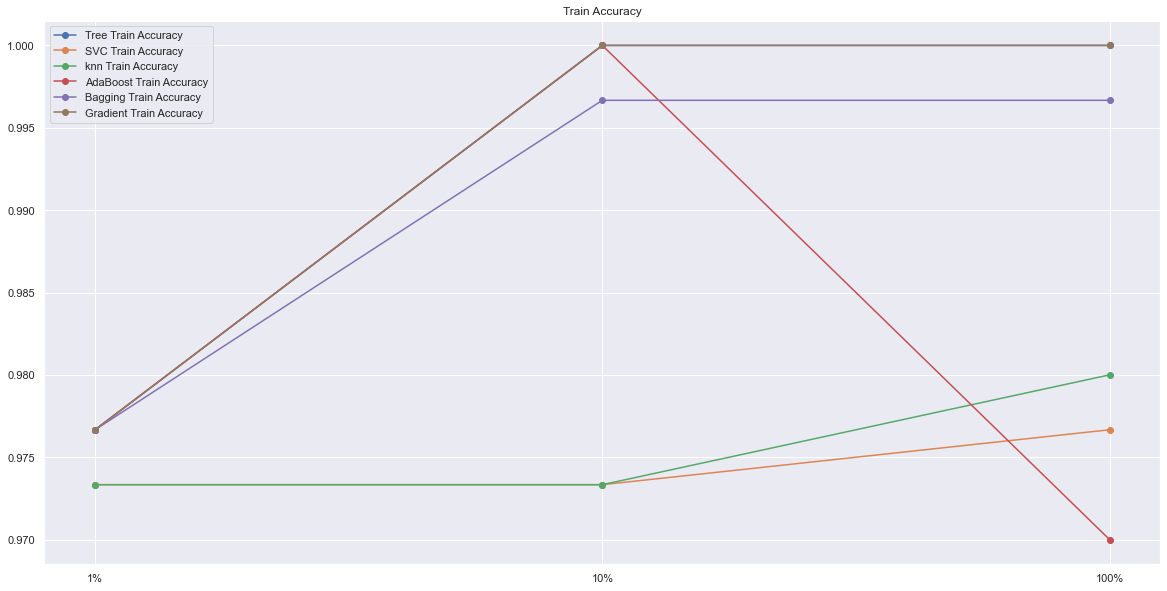

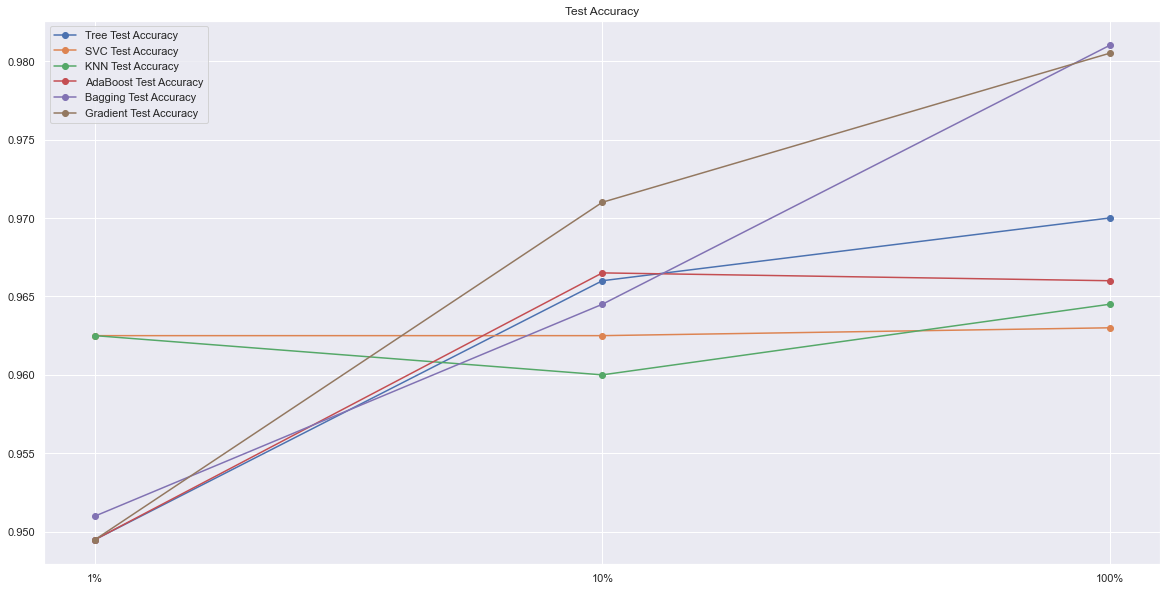

In [69]:
Tree = pd.DataFrame(results['DecisionTreeClassifier'])
sv = pd.DataFrame(results['SVC'])
knn = pd.DataFrame(results['KNeighborsClassifier'])


Adaboost = pd.DataFrame(results['AdaBoostClassifier'])

Bagging = pd.DataFrame(results['BaggingClassifier'])

Gradient = pd.DataFrame(results['GradientBoostingClassifier'])

x = ['1%', '10%', '100%']

plt.plot(x, Tree.iloc[2,:], marker='o',label = "Tree Train Accuracy")
plt.plot(x, sv.iloc[2,:], marker='o',label = "SVC Train Accuracy")
plt.plot(x, knn.iloc[2,:], marker='o',label = "knn Train Accuracy")

plt.plot(x, Adaboost.iloc[2,:], marker='o',label = "AdaBoost Train Accuracy")
plt.plot(x, Bagging.iloc[2,:], marker='o', label = "Bagging Train Accuracy")
plt.plot(x, Gradient.iloc[2,:], marker='o', label = "Gradient Train Accuracy")
plt.title('Train Accuracy')
plt.legend()
plt.show()

plt.plot(x, Tree.iloc[3,:], marker='o',label = "Tree Test Accuracy")
plt.plot(x, sv.iloc[3,:], marker='o',label = "SVC Test Accuracy")
plt.plot(x, knn.iloc[3,:], marker='o',label = "KNN Test Accuracy")

plt.plot(x, Adaboost.iloc[3,:], marker='o',label = "AdaBoost Test Accuracy")
plt.plot(x, Bagging.iloc[3,:], marker='o', label = "Bagging Test Accuracy")
plt.plot(x, Gradient.iloc[3,:], marker='o', label = "Gradient Test Accuracy")
plt.title('Test Accuracy')
plt.legend()
plt.show()

## Predicciones

In [70]:
# Entrena al modelo supervisado en el conjunto de entrenamiento
model = GradientBoostingClassifier().fit(X_train,y_train)
prueba =  pd.DataFrame()
fila = {'Type': 1, 'Air temperature [K]': 300.12, 'Process temperature [K]': 305.9, 'Rotational speed [rpm]': 1500, 'Torque [Nm]': 45.201, 'Tool wear [min]': 107.8}

prueba = prueba.append(fila, ignore_index=True)
model.predict(prueba)

C:\Users\jesus\AppData\Local\Temp\ipykernel_12012\1187405670.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prueba = prueba.append(fila, ignore_index=True)


array([0], dtype=int64)

In [73]:
    fila = {'Type': 1, 'Air temperature [K]': 300.12, 'Process temperature [K]': 305.9, 'Rotational speed [rpm]': 2500, 'Torque [Nm]':80, 'Tool wear [min]': 120.8}

    prueba = prueba.append(fila, ignore_index=True)
    model.predict(prueba)

C:\Users\jesus\AppData\Local\Temp\ipykernel_12012\4081295577.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prueba = prueba.append(fila, ignore_index=True)


array([0, 1], dtype=int64)